<a href="https://colab.research.google.com/github/Abelbimaw/Programming-Python/blob/main/Digital_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
 cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

FilePatch = "Gambar_test/"
FileName = "jpg"
Filetxt = ".jpg"
ImageFile = FilePatch + FileName + Filetxt
print(ImageFile)

Gambar_test/jpg.jpg


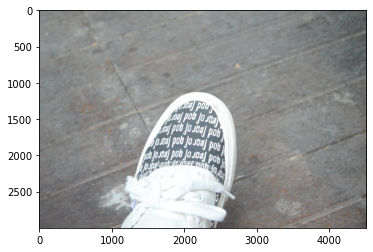

In [16]:
#-open the imagefile
img = Image.open(ImageFile)
plt.imshow(img)
plt.show()

In [18]:
np_image = np.array(img)
print(np_image.shape)

(3000, 4512, 3)


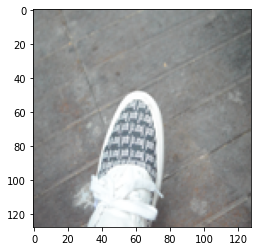

In [22]:
image_resize = img.resize((128,128))
plt.imshow(image_resize)
plt.show()

In [26]:
np_image_resize = np.array(image_resize)
print(np_image_resize.shape)

(128, 128, 3)


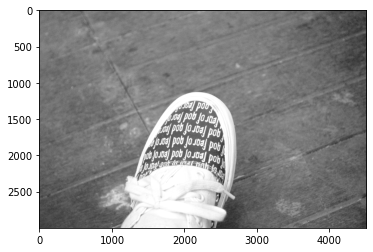

In [30]:
from PIL import ImageOps
gray_image = ImageOps.grayscale(img)
plt.imshow(gray_image, cmap = "gray")
plt.show()

In [31]:
#ImageFilter from PIL
from PIL import ImageFilter

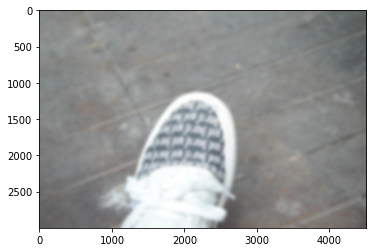

In [36]:
image_filter = img.filter(ImageFilter.GaussianBlur(radius=20))
plt.imshow(image_filter)
plt.show()

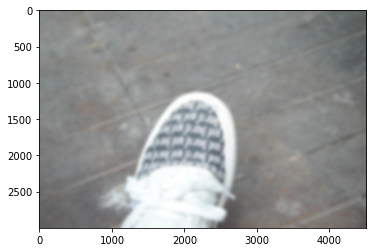

In [41]:
image_filter2 = img.filter(ImageFilter.MedianFilter(size=5))
plt.imshow(image_filter)
plt.show()

In [42]:
import cv2

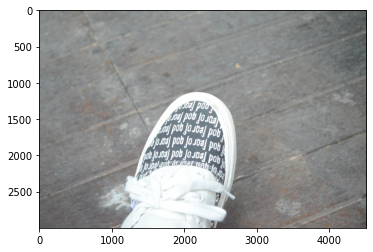

In [51]:
image = cv2.imread('Gambar_test/jpg.jpg') #BGR
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#plt.imshow(image)
plt.imshow(RGB_img)
plt.show()

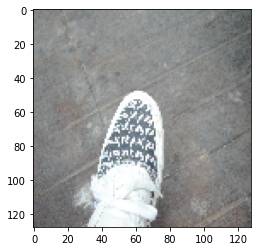

In [47]:
#Resize
RGB_resize = cv2.resize(RGB_img,((128,128)))
plt.imshow(RGB_resize)
plt.show()

<function matplotlib.pyplot.show>

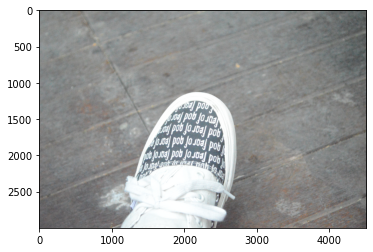

In [48]:
#Blur
blur =cv2.GaussianBlur(RGB_img,(5,5),0)
plt.imshow(blur)
plt.show

<function matplotlib.pyplot.show>

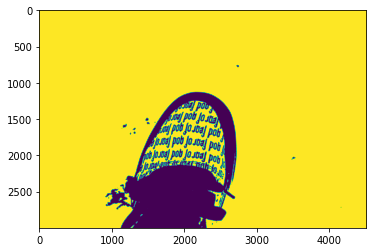

In [54]:
#segmentation
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
ret , thresh =cv2.threshold(gray,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.show

In [58]:
ret, thresh1 = cv2.threshold(gray, 127, 255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY INV','TRUNC','TOZERO','TOZERO INV']
images =[img,thresh1,thresh2,thresh3,thresh4,thresh5]

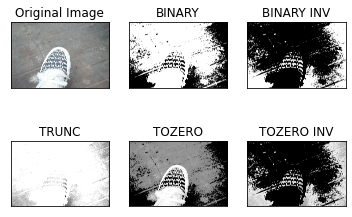

In [64]:

for i in range(6):
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray') #only 'grey and blank
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

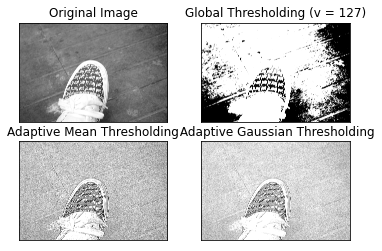

In [68]:
ret, th1 = cv2.threshold(gray,127,255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                      cv2.THRESH_BINARY,11,2)
titles = ['Original Image','Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding',' Adaptive Gaussian Thresholding']
images = [gray,th1, th2, th3]

for i in range(4):
  plt.subplot(2,2,i+1), plt.imshow(images[i],'gray') #only 'grey and blank
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

<function matplotlib.pyplot.show>

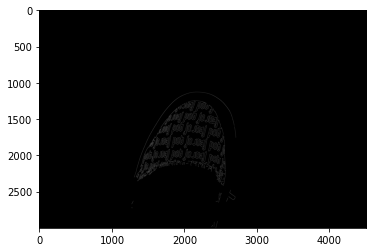

In [76]:
#Sharpening
img_edge = cv2.Canny(gray,100, 200)
plt.imshow(img_edge, cmap='gray')
plt.show